<a href="https://www.kaggle.com/code/sinjeongyeol/spaceshiptitanic-binaryclassification-1?scriptVersionId=99199936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
columns_description = {
    'PassengerId': "'gggg_pp' Id, 'gggg': group id, 'pp': personal id within group",
    'HomePlanet': "Hometown planet",
    'CryoSleep': "frozen sleep",
    'Cabin': "cabin number where the passenger is staying", 
    'Destination': "planet destination",
    'Age': 'age', 
    'VIP': "paid for special VIP service",
    'RoomService': "billed at luxury amenity",
    'FoodCourt': "billed at luxury amenity",
    'ShoppingMall': "billed at luxury amenity",
    'Spa': "billed at luxury amenity",
    'VRDeck': "billed at luxury amenity",
    'Name': "name",
    'Transported': "Target"
}

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.shape, test.shape

((8693, 14), (4277, 13))

## Null data check

In [9]:
null_df = pd.DataFrame()
null_cnt = []
null_percent = []
for col in train.columns:
    cnt = train[col].isnull().sum()
    null_cnt += [cnt]
    null_percent += [cnt / len(train) * 100]
null_df['feature'] = train.columns
null_df['null_count'] = null_cnt
null_df['null_percent'] = null_percent
null_df.sort_values('null_count', ascending=False, inplace=True)
null_df

,feature,null_count,null_percent
2,CryoSleep,217,2.496261
9,ShoppingMall,208,2.392730
6,VIP,203,2.335212
1,HomePlanet,201,2.312205
12,Name,200,2.300702
3,Cabin,199,2.289198
11,VRDeck,188,2.162660
8,FoodCourt,183,2.105142
10,Spa,183,2.105142
4,Destination,182,2.093639


<AxesSubplot:>

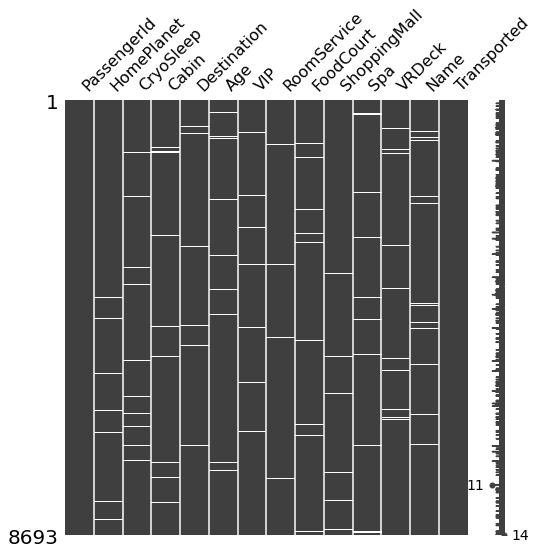

In [10]:
import missingno as msno
msno.matrix(df=train.iloc[:, :], figsize=(8, 8))

<AxesSubplot:>

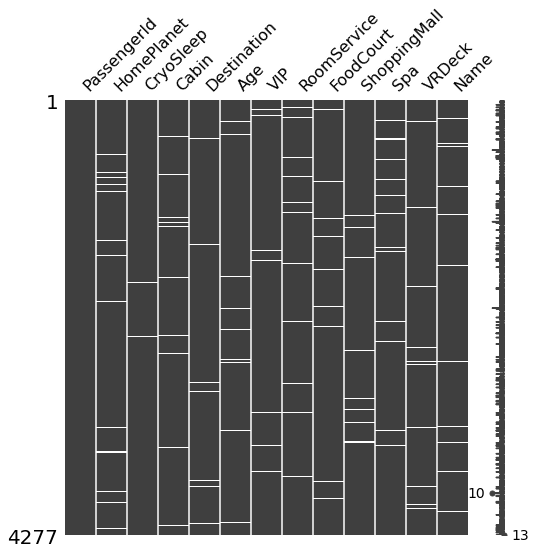

In [11]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8))

In [12]:
feats_cat = []
feats_num = []
for col in train.columns:
    if col in ['PassengerId', 'Transported']:
        continue
    if train[col].dtype == 'object':
        feats_cat += [col]
    else:
        feats_num += [col]
        
feats_cat, feats_num

(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'],
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

## Target label

<AxesSubplot:ylabel='frequency'>

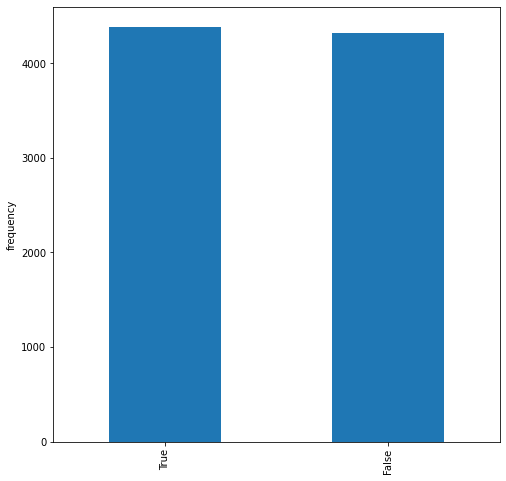

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 8))
train['Transported'].value_counts().plot(ax=ax, kind='bar', ylabel='frequency')

### PassengerId

In [14]:
train['PassengerId'].isnull().sum()

0

### HomePlanet

In [15]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [16]:
def Target_True_func(x):
    return (x == True).sum()

def Target_False_func(x):
    return (x == False).sum()
    
train[['HomePlanet', 'Transported']].groupby('HomePlanet').agg([Target_True_func, Target_False_func])

Transported                  
           Target_True_func Target_False_func
HomePlanet                                   
Earth                  1951              2651
Europa                 1404               727
Mars                    920               839

In [17]:
pd.crosstab(train['HomePlanet'], train['Transported'], margins=True)

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


<AxesSubplot:xlabel='HomePlanet'>

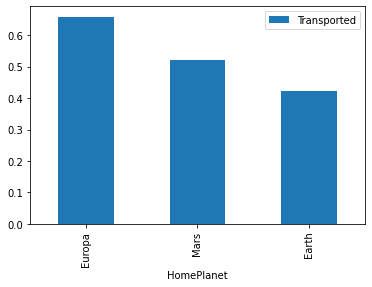

In [18]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet').mean().sort_values('Transported', ascending=False).plot.bar()

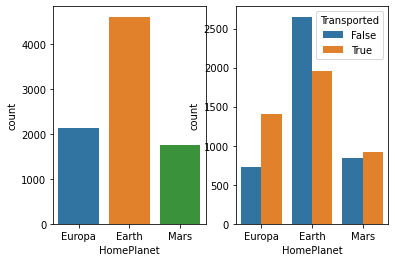

In [19]:
import seaborn as sns
fig, ax = plt.subplots(1, 2)
sns.countplot(x='HomePlanet', data=train, ax=ax[0])
sns.countplot(x='HomePlanet', hue='Transported',data=train, ax=ax[1])
plt.show()